In [28]:
from random import random
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from typing import Literal
from math import log
sns.set_theme(style='darkgrid')
pallete = sns.color_palette('crest')

---
# Ejercicio 1
El siguiente codigo simula valores de una variable aleatoria $X$:


In [7]:
def variableX() -> int:
    """
    Variable aleatoria del ejercicio

    Returns:
        int: Número aleatorio entre [0,3]
    """
    U = random()
    V = random()
    if U < 0.3:
        if V < 0.8: return 0
        else:       return 2
    elif U < 0.75:
        if V < 0.2: return 1
        else:       return 3
    else:           return 2

**a)** Dar la distribucion de probabilidad de la variable X.

In [25]:
def p_X(x: int) -> float:
    """
    Función de probabilidad de masa de X

    Args:
        x (int): Valor en el dominio de p

    Returns:
        float: Probabilidad para x
    """
    probs = {
        0: 0.24,
        1: 0.09,
        2: 0.31,
        3: 0.36
    }
    return probs.get(x, 0.0)

**b)** Explicar el metodo de la transformada inversa para generar valores de esta variable.

**c)** Implementar el codigo utilizando el método explicado en **(b)**.

In [34]:
def TIX() -> int:
    U = random()
    if   U < 0.24: return 0
    elif U < 0.33: return 1
    elif U < 0.64: return 2
    else:          return 3

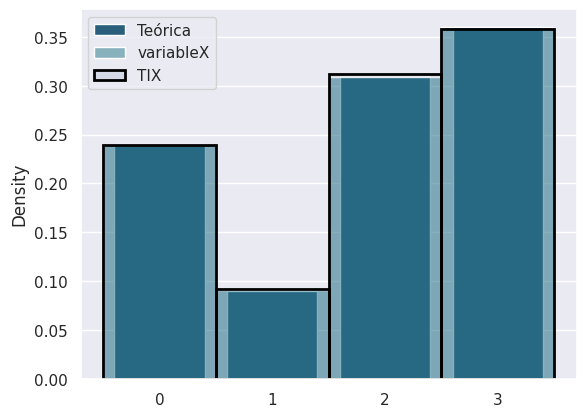

In [58]:
Nsim = 100_000
samples = [variableX() for _ in range(Nsim)]
TIX_samples = [TIX() for _ in range(Nsim)]

p_X_values = [p_X(x) for x in range(4)]

sns.barplot(x=[0, 1, 2, 3],
            y=p_X_values,
            color=pallete[4],
            label="Teórica")
sns.histplot(samples,
            stat='density',
            discrete=True,
            alpha=0.5,
            label="variableX",
            color=pallete[3])

sns.histplot(TIX_samples,
            stat='density',
            discrete=True,
            label="TIX",
            color=pallete[5],
            alpha=0.1,
            edgecolor="black",
            linewidth=2)

plt.legend()
plt.show()

--
# Ejercicio 2
La funcion de densidad de una variable aleatoria X esta dada por:
$$
f(x)=
\begin{cases}
    \frac{1}{4} \quad 0\leq x < 2\\[0.3cm]
    \frac{1}{x²} \quad 2 \leq x\\[0.3cm]
    0 \quad x<0
\end{cases}
$$

In [2]:
def f(x:float) -> float:
    return  np.where(
        (0 <= x) & (x < 2), 1/4, 
        np.where((2 <= x), 1/(x**2), 0)
)

In [ ]:
def TIX() -> float:
    """
    Generacion de variable aleatoria X
    utilizando Método de la Transformada Inversa.

    Returns:
        float: Valor de v.a continua
    """
    U = random()
    if U < 1/2:
        return 4*U
    else: return 1/(1-U)

/tmp/ipykernel_84893/42691029.py:4: RuntimeWarning: divide by zero encountered in divide
  np.where((2 <= x), 1/(x**2), 0)


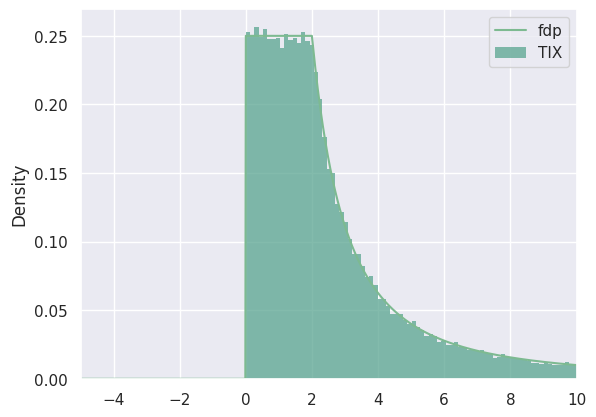

In [5]:
Nsim = 100_000
x = np.linspace(-5,10, 1000)
TIX_samples = [TIX() for _ in range(Nsim)]
TIX_samples = [x for x in TIX_samples if x < 1000]

sns.lineplot(x=x, y=f(x),label="fdp", color=pallete[0])
sns.histplot(TIX_samples, stat='density', color=pallete[1], label="TIX")
plt.xlim(-5,10)
plt.legend()
plt.show()

**b)** Escribir un codigo en Python que genere valores de X utilizando el metodo dado en **a)**. Utilizar este codigo para estimar $P(X ≤ 3)$ con 10000 simulaciones. Imprimir este valor

In [7]:
def probability_simulation(Nsim:int) -> float:
    """
    Simulación de probabilidad para el ejercicio
    P(X <= 3)

    Args:
        Nsim (int): Número de simulaciones

    Returns:
        float: Probabilidad que X sea menor o igual a 3
    """
    probability = 0
    for _ in range(Nsim):
        X = TIX()
        if X <= 3:
            probability += 1
    return probability / Nsim

In [9]:
Nsim = 10_000
print(f"Nsim:{Nsim}\t P(X <= 3) = {probability_simulation(Nsim=Nsim)}")

Nsim:10000	 P(X <= 3) = 0.6607


---
# Ejercicio 3
Sea Y una variable aleatoria con distribucion geometrica,  $Y \thicksim Geom(0.6)$, y sea $X$ una variable aleatoria que tiene una distribucion dada por:
$$
P(X=i) = P(Y=i | Y \leq 20)
$$
1. Explicar como puede aplicarse el método de aceptación y rechazo utilizando $Y$ como rechazo, para
generar valores de $X$

**EN HOJA**

 2. Escribir un codigo en Python que genere valores de X utilizando el metodo dado en a)

In [11]:
def Geom_Y(p:float):
    U = random()
    return int(log(1-U)/log(1-p)) + 1

def MRX () -> int:
    """
    Generación de X a través del método de rechazo

    Returns:
        int: Número aleatorio
        con distribución P( Y=i | Y <= 20)
    """
    while True:
        #Simulo Y
        c = 1.0001
        Y = Geom_Y(p=0.6)
        q_Y = 0.6 * (1-0.6)**(Y-1)
        U = random()
        if  U < 1/ c * q_Y:
            return Y


In [20]:
samples = [MRX() for _ in range(10)]
print(f"VALORES GENERADOS POR EL MÉTODO DE RECHAZO🚫🎲 -> {samples}")

VALORES GENERADOS POR EL MÉTODO DE RECHAZO🚫🎲 -> [1, 2, 1, 1, 1, 1, 1, 1, 2, 1]


---
# Ejercicio 4
Una compania de seguros tiene 1000 clientes, cada uno de los cuales puede presentar un reclamo en forma independiente en el proximo mes con probabilidad $p= 0.05$. Se asume que los montos de los reclamos son variables aleatorias independientes con distribucion exponencial con media $800.

**a)** Disenar una simulación de los reclamos de clientes a lo largo del próximo mes. Describir las variables aleatorias utilizadas en la simulacion.


**__Datos__**
- 1000 clientes
- Cada cliente $X_1,\ldots,X_{1000}$ puede presentar de forma independiente en el próximo mes un reclamo con probabilidad $p=0.05$
- Montos de los reclamos son variables aleatorias independientes con $\thicksim \mathcal{E}(\lambda=800) $

- Se pide simular los reclamos de clientes a lo largo del próximo mes.

# Descripciópn de las variables aleatorias utilizadas.
- Se utilizarán 1000 variables aleatorias de Bernulli con probabilidad $p=0.05$ ya que cada cliente tiene esa probabilidad de generar un reclamo.
- Se utilizará una variable aleatoria con distribución exponencial y media de 1/800. i.e $M_1,\ldots,M_n \thicksim \mathcal{E}(\lambda=\frac{1}{800})$ donde $n$ son el número de reclamos realizados.


**b)** Implementar la simulacion descripta en a) y utilizarla para estimar la probabilidad de que la suma de esos reclamos exceda los $50000 con 10000 simulaciones.
i.e estimar $P(\text{Suma de reclamos} >= 50000)$ con 10000 simulaciones

In [ ]:
def customers_claiming(p:float) -> Literal[0, 1]:
    """
    - Determina con una probabilidad de p si el cliente RECLAMA o NO RECLAMA
    - Variable aleatoria de Bernulli

    Returns:
        {0,1}: 0 en caso de que no reclame
            1 si reclama
    """
    U = random()
    if U < p: return 1
    else: return 0

def claim_amount(lamda:float) -> float:
    """
    - Monto del reclamo
    - Variable aleatoria Exponencial de media lambda

    Args:
        lamda (float): Parámetro de la variable

    Returns:
        float: _description_
    """
    return -log(1 - random()) / lamda

def claiming_simulation() -> int:
    """
    - Simulación del RECLAMO o NO RECLAMO de 1000 clientes 

    Returns:
        int: Cantidad de reclamantes
    """
    claimers = 0
    for _ in range(1000):
        X = customers_claiming(p=0.05)
        if X: claimers +=1
    return claimers


def problematic_one_simulation() -> float:
    """
    UNA simulación a la problemática

    Returns:
        float: Suma del monto por reclamos
    """
    claimers = claiming_simulation()
    amount_of_claims = 0
    for _ in range(claimers):
        amount_of_claims += claim_amount(lamda=1/800)
    return amount_of_claims


def simulation(Nsim:int) -> float:
    """
    Probabilidad de que la suma de reclamos sea mayor a $50000

    Args:
        Nsim (int): Número de simulaciones

    Returns:
        float: Probabilidad
    """
    probability = 0
    for _ in range(Nsim):
        amount_of_claims = problematic_one_simulation()
        if amount_of_claims > 50000:
            probability += 1 
    return probability / Nsim

In [30]:
print(f"(Suma de reclamos > 50000) = {simulation(Nsim=10_000)}")

(Suma de reclamos > 50000) = 0.1092
